# Square lattice with circular holes

In [1]:
import meep as mp
from meep import mpb

import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use("science")
mpl.rcParams.update({"font.size": 46})

In [2]:
import sys
sys.path.append("/home/ben/Desktop/MSc thesis/github/Thesis_name/Simulations/")
from ExternalFunctions import (plot_unit_cell_cross_sections, isofreq_plot, square_lattice_bands,
                              geom_square_PCS_slope)

In [3]:
save = True
plot = True
simulate = False

In [4]:
resolution = 32
num_bands = 8

From the PNAS paper:

In [5]:
a = 290 # nm
r = 103 / a 
t = 200 / a

In [6]:
sx = 1 
sy = 1 
sz = 10 
cell_size = mp.Vector3(sx, sy, sz)
geometry_lattice = mp.Lattice(size=mp.Vector3(1, 1, sz))

In [7]:
geometry = [mp.Block(center=mp.Vector3(0,0,0), size=mp.Vector3(mp.inf,mp.inf,t), material=mp.Medium(index = 1.9935))]
geometry.append(mp.Cylinder(radius=r, height = t, material=mp.Medium(epsilon=1)))

-----------
Initializing structure...
time for choose_chunkdivision = 6.91414e-06 s
Working in 3D dimensions.
Computational cell is 1 x 1 x 10 with resolution 32
     block, center = (0,0,0)
          size (1e+20,1e+20,0.689655)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (3.97404,3.97404,3.97404)
     cylinder, center = (0,0,0)
          radius 0.355172, height 0.689655, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.972703 s
-----------


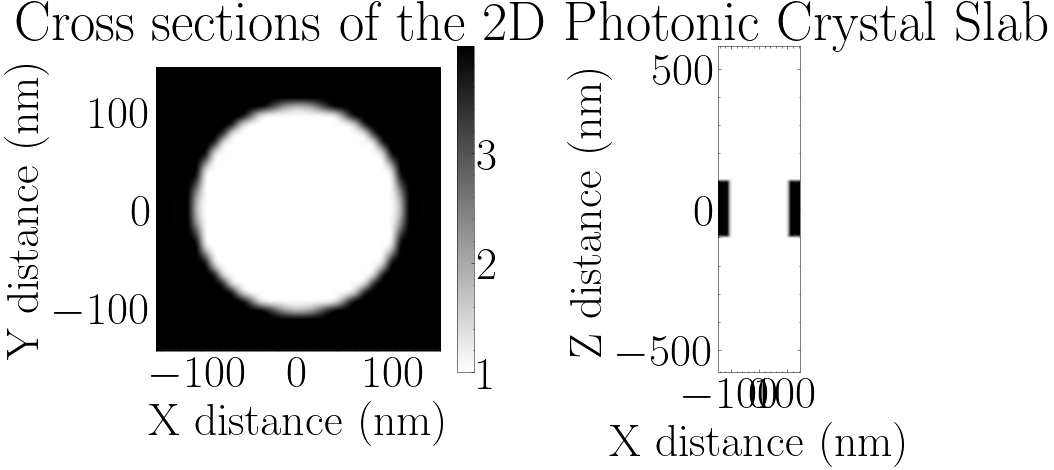

In [8]:
sim_params = resolution, cell_size, geometry
fig,  ax = plot_unit_cell_cross_sections(a, sim_params)

In [9]:
import os
path = os.path.abspath(os.getcwd())
print(path)

/home/ben/Desktop/MSc thesis/github/Thesis_name/Simulations/04_Photonic_Crystal_Slabs/Circular_Hole_Square_Lattice


In [10]:
f1 = np.genfromtxt(path+"/data/isofreq_band.dat", delimiter=",")[:,1:]
print(np.shape(f1))

(1682, 6)


In [11]:
def isofreq_plot_1(a, file):

    # Note: a has to be in nanometers!

    f1 = file

    import pandas as pd
    import matplotlib

    fig, ax = plt.subplots(figsize=(14, 10))
    title = "Isofrequency diagram in momentum space"

    light_speed = 3e8

    df = pd.DataFrame(
        dict(x=f1[:-1, 1], y=f1[:-1, 2], z=f1[:-1, -1] * light_speed / (a * 10 ** 3))
    )  # since a is in nm and we want THz
    xcol, ycol, zcol = "x", "y", "z"
    df = df.sort_values(by=[xcol, ycol])
    xvals = df[xcol].unique()
    yvals = df[ycol].unique()
    zvals = df[zcol].values.reshape(len(xvals), len(yvals)).T
    CS = ax.contour(xvals, yvals, zvals, levels=100, cmap="cool")
    #ax.set_title(title)
    ax.set_xlabel("$k_x \, a / 2\pi$ ")
    ax.set_ylabel("$k_y \, a / 2\pi$ ")
    norm = matplotlib.colors.Normalize(vmin=CS.cvalues.min(), vmax=CS.cvalues.max())
    sm = plt.cm.ScalarMappable(norm=norm, cmap=CS.cmap)
    sm.set_array([])
    fig.colorbar(sm, label="$\\nu$ (THz)")

    plt.text(
        0.02,
        0.03,
        "$\\Gamma$",
        bbox=dict(facecolor="gray", alpha=0.9, boxstyle="Round"),
        fontsize=46,
        color="white",
    )
    plt.text(
        0.02,
        0.45,
        "$Y$",
        bbox=dict(facecolor="gray", alpha=0.9, boxstyle="Round"),
        fontsize=46,
        color="white",
    )
    plt.text(
        0.445,
        0.45,
        "$M$",
        bbox=dict(facecolor="gray", alpha=0.9, boxstyle="Round"),
        fontsize=46,
        color="white",
    )
    plt.text(
        0.45,
        0.03,
        "$X$",
        bbox=dict(facecolor="gray", alpha=0.9, boxstyle="Round"),
        fontsize=46,
        color="white",
    )
    ax.set_xticks([0.0,0.1,0.2,0.3,0.4,0.5])
    plt.setp(ax.get_xticklabels()[0], visible=False)  
    return fig, ax

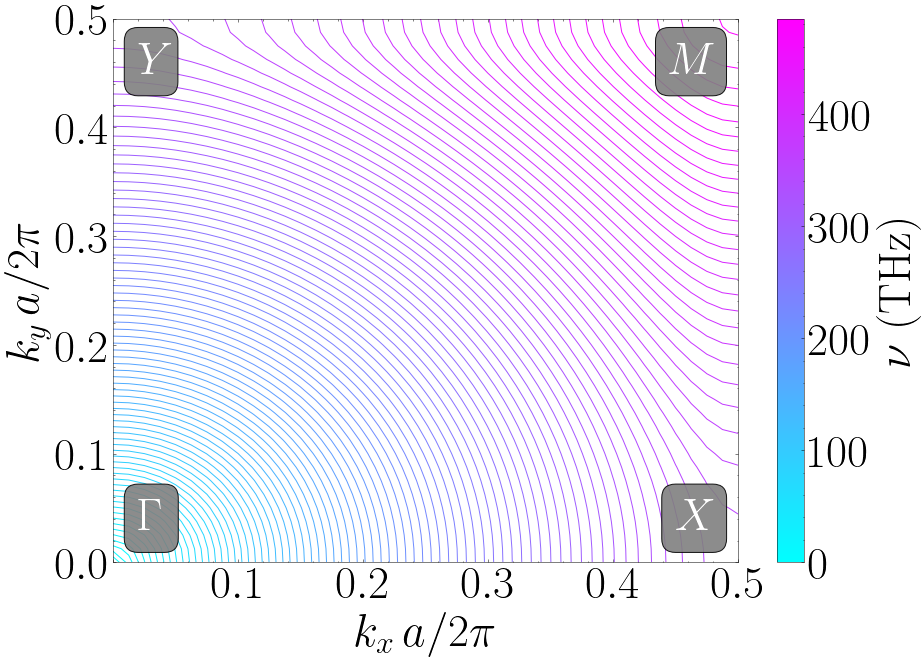

In [12]:
fig, ax  = isofreq_plot_1(a, f1)

In [13]:
fig.savefig('Isofrequency_diagram.pdf')

In [14]:
f2 = np.genfromtxt(path+"/data/hole_square_lattice_bands.dat", delimiter=",")[:-1,1:]
f3 = np.genfromtxt(path+"/data/hole_square_lattice_bands_TE.dat", delimiter=",")[:-1,1:]
f4 = np.genfromtxt(path+"/data/hole_square_lattice_bands_TM.dat", delimiter=",")[:-1,1:]

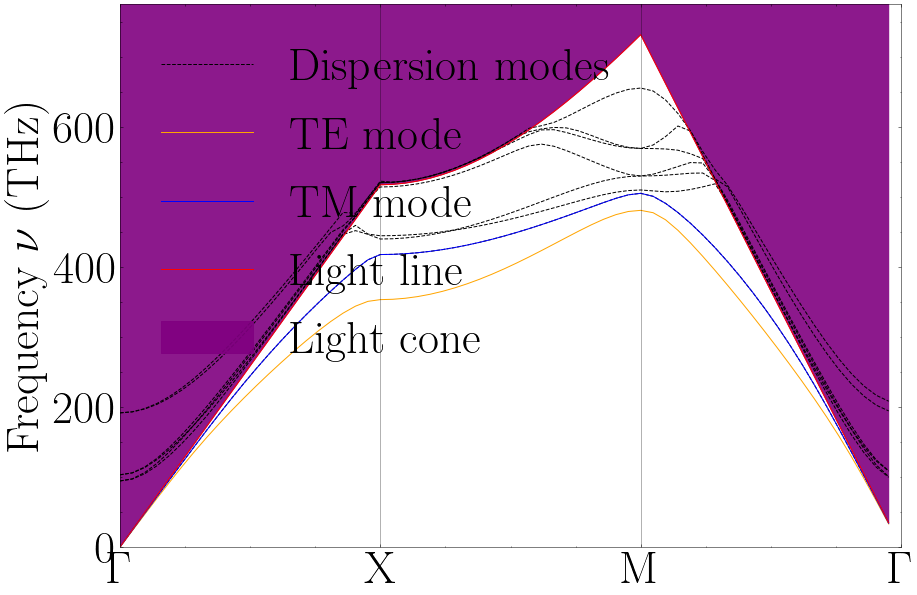

In [15]:
a = 2.9 * 1e-7
files = [f2,f3,f4]
fig, ax = square_lattice_bands (a, files)

In [16]:
if save == True:
    fig.savefig('bands_square_lattice_circular_holes.pdf')

## Slope walls

Let's see what happens when we include the slope walls:

In [17]:
dielec_const = 1.9935
alpha = 7.9 * np.pi / 180
params = dielec_const, r, t, alpha

custom_material = True

In [18]:
eps_func = geom_square_PCS_slope(params)
default_material = eps_func

-----------
Initializing structure...
time for choose_chunkdivision = 6.91414e-06 s
Working in 3D dimensions.
Computational cell is 1 x 1 x 10 with resolution 32
subpixel-averaging is 14.017% done, 24.5456 s remaining
subpixel-averaging is 29.7506% done, 9.59449 s remaining
subpixel-averaging is 46.6286% done, 4.65687 s remaining
subpixel-averaging is 59.5016% done, 2.72254 s remaining
subpixel-averaging is 70.9442% done, 1.6768 s remaining
subpixel-averaging is 84.1033% done, 0.761223 s remaining
subpixel-averaging is 99.8369% done, 0.00660219 s remaining
subpixel-averaging is 15.1612% done, 22.632 s remaining
subpixel-averaging is 28.0342% done, 10.3618 s remaining
subpixel-averaging is 43.4818% done, 5.21079 s remaining
subpixel-averaging is 59.7876% done, 2.71199 s remaining
subpixel-averaging is 75.2352% done, 1.3282 s remaining
subpixel-averaging is 91.8271% done, 0.360288 s remaining
subpixel-averaging is 14.303% done, 24.3579 s remaining
subpixel-averaging is 25.7457% done, 11.

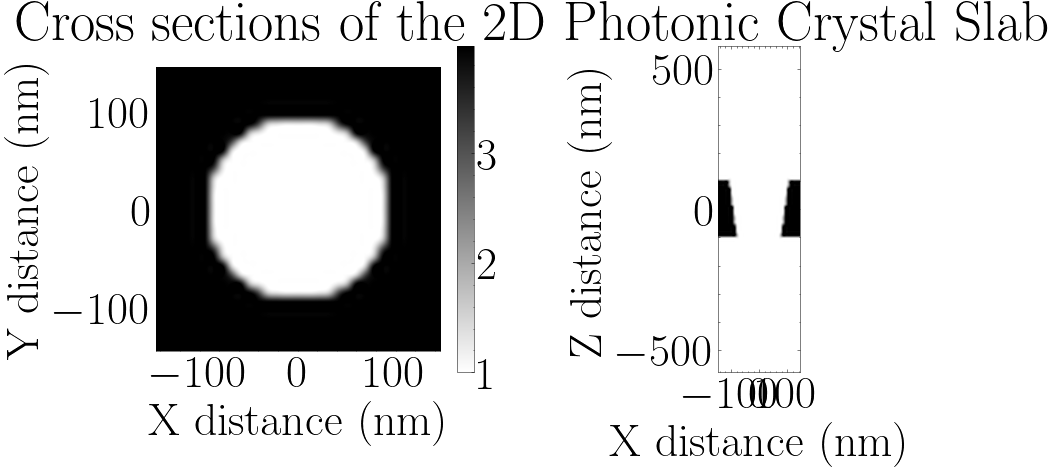

In [19]:
sim_params = resolution, cell_size, default_material

a = 290 #nanometers

fig, ax = plot_unit_cell_cross_sections(a, sim_params, custom_material = True)

In [20]:
if save == True: 
    fig.savefig("Cross_sections_slope_walls.pdf")

In [21]:
f5 = np.genfromtxt(path+"/data/isofreq_slope_band.dat", delimiter=",")[:,1:]

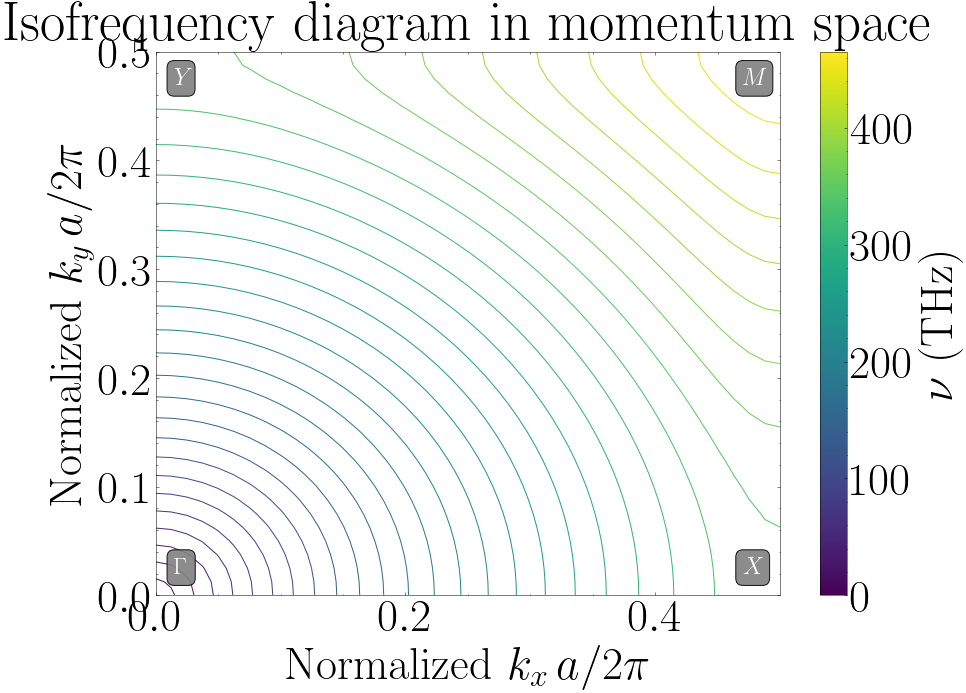

In [22]:
fig, ax  = isofreq_plot(a, f5)

The isofrequency diagrams look pretty similar. See that colorbar has slightly inferior values with slope and that contour lines are slightly shifted. Let's check the band diagram.

In [23]:
f6 = np.genfromtxt(path+"/data/hole_square_lattice_slope_band.dat", delimiter=",")[:-1,1:]

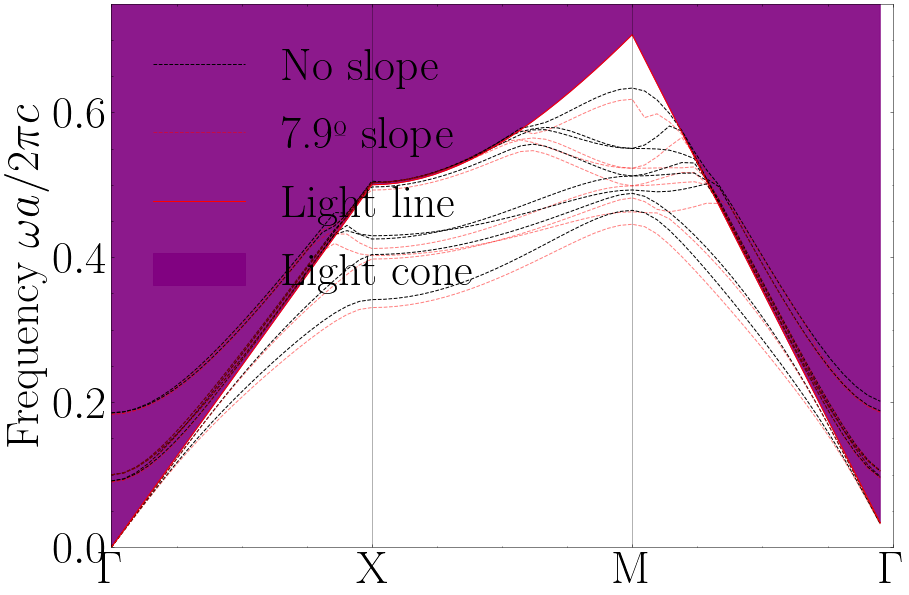

In [24]:
fig, ax = plt.subplots(figsize=(14,10))

for i in range(1,9):
    
    if i == 1:
        ax.plot(np.linspace(0,len(f2[:,1])-1, len(f2[:,1])), f2[:,-i], c='black', linestyle='dashed', label = 'No  slope')
        ax.plot(np.linspace(0,len(f6[:,1])-1, len(f6[:,1])), f6[:,-i], c='red', linestyle='dashed', alpha=0.5, label = '7.9º  slope') 

    else:
        ax.plot(np.linspace(0,len(f2[:,1])-1, len(f2[:,1])), f2[:,-i], c='black', linestyle='dashed')
        ax.plot(np.linspace(0,len(f6[:,1])-1, len(f6[:,1])), f6[:,-i], c='red', alpha=0.5, linestyle='dashed') 


X_index = int(0.33*len(f2[:,1]))+1
M_index = int(0.66*len(f2[:,1]))+1

k_point = np.linspace(0,len(f2[:,1])-1, len(f2[:,1]))
Light_line = np.sqrt(f2[:,1]**2 + f2[:,2]**2)

ax.plot(k_point,  np.array(Light_line), c='r', label ='Light line')
ax.fill_between(k_point, Light_line, np.ones_like(k_point), color='purple', alpha=0.9, label='Light cone') 


plt.axvline(x= X_index, c='black', alpha=0.3)
plt.axvline(x= M_index, c='black', alpha=0.3)

ax.set_xticks([1,  X_index, M_index, len(f2[:,1])])
ax.set_xticklabels(['$\\Gamma$', 'X', 'M','$\\Gamma$'])
ax.set_xlim([1,len(f2[:,1])])
ax.set_ylim([0,0.75])
ax.set_xlabel("")
ax.set_ylabel("Frequency $\omega a / 2 \pi c$")
ax.legend(loc=2)

In [25]:
if save == True:
    fig.savefig('band_diagram_slope_vs_no_slope_cylinders_square_lattice.pdf')

In [26]:
f7 = np.genfromtxt(path+"/data/hole_square_lattice_slope_bands_TE.dat", delimiter=",")[:-1,1:]
f8 = np.genfromtxt(path+"/data/hole_square_lattice_slope_bands_TM.dat", delimiter=",")[:-1,1:]

(<mpl_toolkits.axes_grid1.inset_locator.BboxPatch at 0x7f7942462eb0>,
 <mpl_toolkits.axes_grid1.inset_locator.BboxConnector at 0x7f7942518370>)

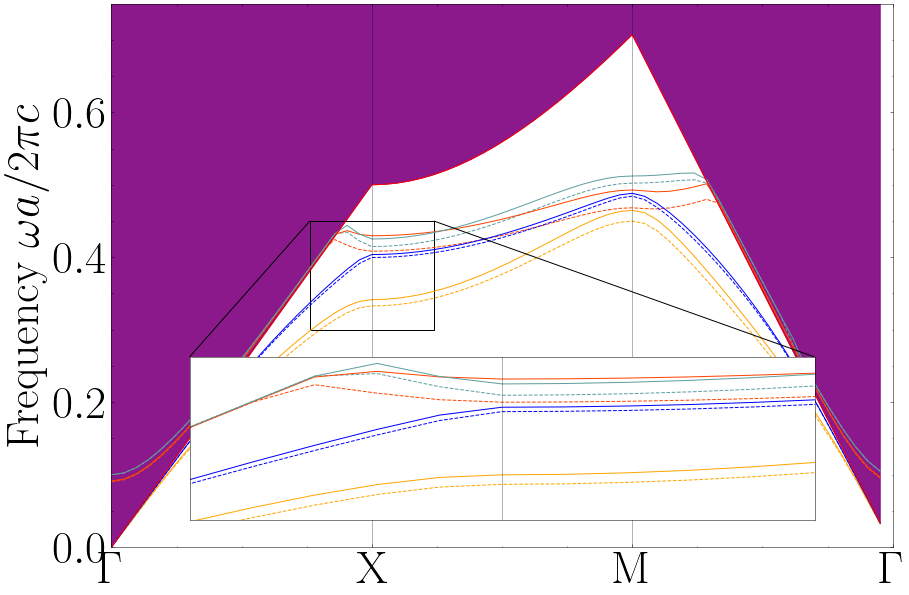

In [29]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset, InsetPosition


fig, ax = plt.subplots(figsize=(14,10))

ax.plot(np.linspace(1,len(f7[:,1]), len(f7[:,1])), f7[:,-2], c='orange', linestyle='dashed')
ax.plot(np.linspace(1,len(f7[:,1]), len(f7[:,1])), f7[:,-1], c='orangered', linestyle='dashed')

ax.plot(np.linspace(1,len(f8[:,1]), len(f8[:,1])), f8[:,-2], c='blue', linestyle='dashed')
ax.plot(np.linspace(1,len(f8[:,1]), len(f8[:,1])), f8[:,-1], c='cadetblue', linestyle='dashed')

ax.plot(np.linspace(1,len(f3[:,1]), len(f3[:,1])), f3[:,-2], c='orange', label = 'TE mode: dielec. band')
ax.plot(np.linspace(1,len(f3[:,1]), len(f3[:,1])), f3[:,-1], c='orangered', label = 'TE mode: air band')

ax.plot(np.linspace(1,len(f4[:,1]), len(f4[:,1])), f4[:,-2], c='blue', label = 'TM mode: dielec. band')
ax.plot(np.linspace(1,len(f4[:,1]), len(f4[:,1])), f4[:,-1], c='cadetblue', label = 'TM mode: air band')

X_index = int(0.33*len(f2[:,1]))+1
M_index = int(0.66*len(f2[:,1]))+1

k_point = np.linspace(0,len(f2[:,1])-1, len(f2[:,1]))
Light_line = np.sqrt(f2[:,1]**2 + f2[:,2]**2)

ax.plot(k_point,  np.array(Light_line), c='r', label ='Light line')
ax.fill_between(k_point, Light_line, np.ones_like(k_point), color='purple', alpha=0.9, label='Light cone') 


plt.axvline(x= X_index, c='black', alpha=0.3)
plt.axvline(x= M_index, c='black', alpha=0.3)

ax.set_xticks([1,  X_index, M_index, len(f2[:,1])])
ax.set_xticklabels(['$\\Gamma$', 'X', 'M','$\\Gamma$'])
ax.set_xlim([1,len(f2[:,1])])
ax.set_ylim([0,0.75])
ax.set_xlabel("")
ax.set_ylabel("Frequency $\omega a / 2 \pi c$")
#ax.legend(loc=2)

axins = ax.inset_axes([0.35,0.05,0.5,0.35] )#Left, Bottom, Width, Height

axins.plot(np.linspace(1,len(f7[:,1]), len(f7[:,1])), f7[:,-2], c='orange', linestyle='dashed')
axins.plot(np.linspace(1,len(f7[:,1]), len(f7[:,1])), f7[:,-1], c='orangered', linestyle='dashed')

axins.plot(np.linspace(1,len(f8[:,1]), len(f8[:,1])), f8[:,-2], c='blue', linestyle='dashed')
axins.plot(np.linspace(1,len(f8[:,1]), len(f8[:,1])), f8[:,-1], c='cadetblue', linestyle='dashed')

axins.plot(np.linspace(1,len(f3[:,1]), len(f3[:,1])), f3[:,-2], c='orange', label = 'TE mode: dielec. band')
axins.plot(np.linspace(1,len(f3[:,1]), len(f3[:,1])), f3[:,-1], c='orangered', label = 'TE mode: air band')

axins.plot(np.linspace(1,len(f4[:,1]), len(f4[:,1])), f4[:,-2], c='blue', label = 'TM mode: dielec. band')
axins.plot(np.linspace(1,len(f4[:,1]), len(f4[:,1])), f4[:,-1], c='cadetblue', label = 'TM mode: air band')
axins.set_xlim([X_index-5, X_index+5])
axins.axvline(x= X_index, c='black', alpha=0.3)

axins.set_ylim([0.3, 0.45])
axins.set_xticklabels([])
axins.set_xticks([])
axins.set_yticklabels([])
axins.set_yticks([])

ip = InsetPosition(ax,[0.1,0.05,0.8,0.3])
axins.set_axes_locator(ip)
mark_inset(ax, axins, 2,1)


In [28]:
if save == True:
    fig.savefig('band_diagram_slope_vs_no_slope_POL_cylinders_square_lattice.pdf')